In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-rk-converge)

We solve the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. We start by getting a reference solution to validate against.

In [2]:
from scipy.integrate import solve_ivp
du_dt = lambda t, u: sin((t + u)**2)
tspan = (0.0, 4.0)
u0 = -1.0
sol = solve_ivp(du_dt, tspan, [u0], dense_output=True, atol=1e-13, rtol=1e-13)
u_ref = sol.sol

Now we perform a convergence study of our two Runge–Kutta implementations.

In [3]:
n = array([int(2 * 10**k) for k in linspace(0, 3, 7)])
err = {"IE2" : [], "RK4" : []}
results = PrettyTable(["n", "IE2 error", "RK4 error"])
for k in range(len(n)):
    t, u = FNC.ie2(du_dt, tspan, u0, n[k])
    err["IE2"].append( abs(u_ref(4)[0] - u[0][-1]) )
    t, u = FNC.rk4(du_dt, tspan, u0, n[k])
    err["RK4"].append( abs(u_ref(4)[0] - u[0][-1]) )
    results.add_row([n[k], err["IE2"][-1], err["RK4"][-1]])

print(results)

+------+------------------------+------------------------+
|  n   |       IE2 error        |       RK4 error        |
+------+------------------------+------------------------+
|  2   |   1.7690264118810441   |   0.8206513302232612   |
|  6   |   0.5126838225133257   |   0.7919245473433536   |
|  20  |  0.002966971266360252  | 4.0177650143746746e-05 |
|  63  | 0.00021416270501584123 | 3.581705267929891e-07  |
| 200  | 1.951309601522233e-05  | 3.326041442264227e-09  |
| 632  | 1.9058382192405077e-06 | 3.2657876403163755e-11 |
| 2000 | 1.8883901087285437e-07 | 2.6711965972481266e-13 |
+------+------------------------+------------------------+


The amount of computational work at each time step is assumed to be proportional to the number of stages. Let's compare on an apples-to-apples basis by using the number of $f$-evaluations on the horizontal axis.

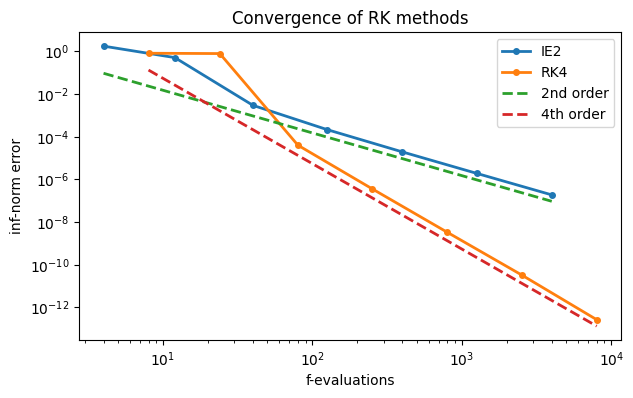

In [4]:
loglog(2 * n, err["IE2"], "-o", label="IE2")
loglog(4 * n, err["RK4"], "-o", label="RK4")
plot(2 * n, 0.5 * err["IE2"][-1] * (n / n[-1])**(-2), "--", label="2nd order")
plot(4 * n, 0.5 * err["RK4"][-1] * (n / n[-1])**(-4), "--", label="4th order")

xlabel("f-evaluations"),  ylabel("inf-norm error")
legend()
title("Convergence of RK methods");

The fourth-order variant is more efficient in this problem over a wide range of accuracy.